In [4]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar
import math

In [ ]:
#Loading Dataset

df = pd.read_csv("egier_data.csv")


Saving aol_data.xlsx - in (1).csv to aol_data.xlsx - in (1).csv


In [ ]:
#Define Variables
y = df.values.flatten()
t = np.arange(1,len(y)+1)
df2 = pd.DataFrame({
        "Month" : t,
        "Production" : y,})

**Visualize Data**



Text(0, 0.5, 'Prediksi')

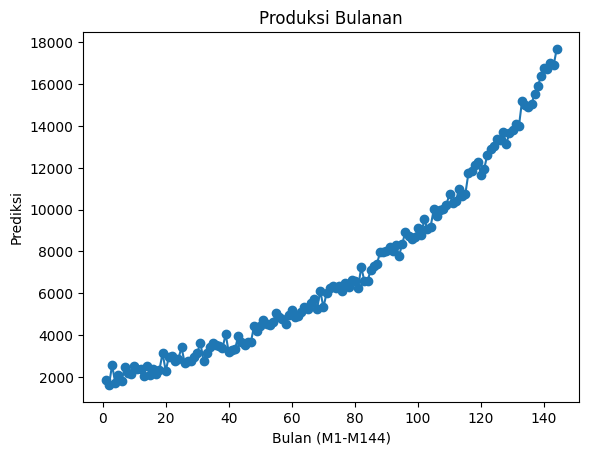

In [ ]:
#Visualize
plt.plot(t,y,marker='o')
plt.title("Produksi Bulanan")
plt.xlabel("Bulan (M1-M144)")
plt.ylabel("Prediksi")

# Number 1


=== Hybrid Scaled ===
Koef: [1164.79887872    2.5157624  2356.98142161  658.02217288]
RMSE = 283.246, R² = 0.9957


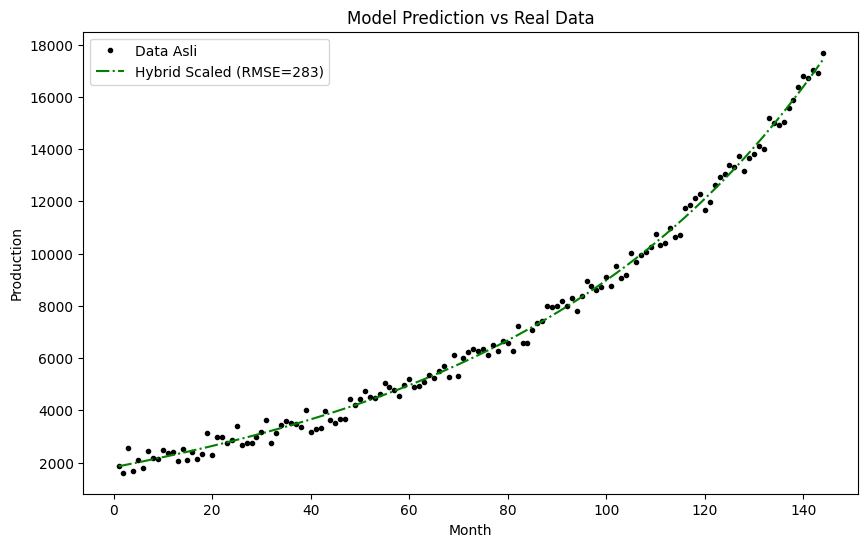

In [ ]:
# --- data ---
y = df2['Production'].values.astype(float)
t = np.arange(1, len(y)+1)


# hybrid t scaled function
def hybrid_scaled(t, a, b, c, d):
    t_scaled = t / max(t)
    return a * np.exp(b * t_scaled) + c * t_scaled + d

a0 = max(1.0, y[0]/2)
b0 = 1e-5
c0 = (y[-1]-y[0]) / len(y)
d0 = np.median(y)

# Contant

popt3, _ = curve_fit(hybrid_scaled, t, y,
p0=[a0, b0, c0, d0], maxfev=200000)
# Errors
yhat = hybrid_scaled(t, *popt3)
rmse= np.sqrt(np.mean((y-yhat)**2))
r2 = 1 - np.sum((y-yhat)**2) / np.sum((y-np.mean(y))**2)

print("\n=== Hybrid Scaled ===")
print(f"Koef: {popt3}")
print(f"RMSE = {rmse:.3f}, R² = {r2:.4f}")


# Plot
plt.figure(figsize=(10,6))
plt.plot(t, y, 'k.', label="Data Asli")
plt.plot(t, yhat, 'g-.', label=f"Hybrid Scaled (RMSE={rmse:.0f})")
plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Model Prediction vs Real Data")
plt.legend()
plt.show()


# Number 2

Max Error:  0.9385810019
Mean Error: 0.0800407225
--------------------------------------


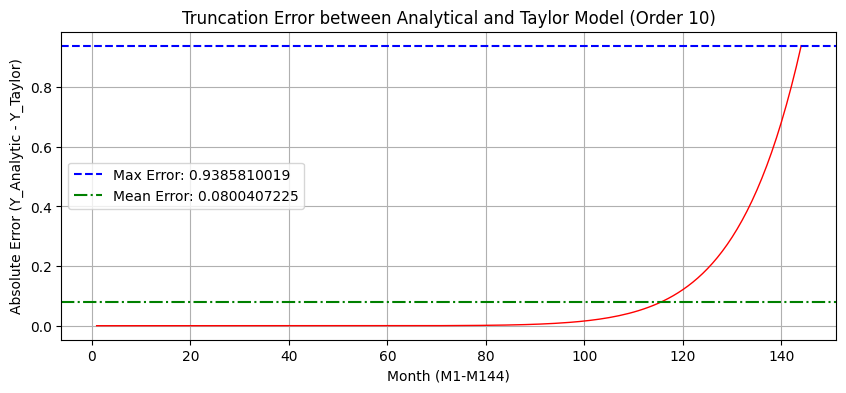

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Constant and Coefficient
t_max_data = 144
popt_P1 = np.array([1164.79884026, 2.51576243, 2356.98144411, 658.02223088])
A, B, C, D = popt_P1

#Hybrid Scaled Function

def hybrid_scaled_analytic(t_input, a, b, c, d):
    t_input = np.asarray(t_input)
    t_scaled = t_input / t_max_data
    return a * np.exp(b * t_scaled) + c * t_scaled + d

#Taylor Series of Order 10 Approximation

def hybrid_scaled_taylor_o10(t_input, a, b, c, d):
    t_input = np.asarray(t_input)
    t_scaled = t_input / t_max_data
    x = b * t_scaled
    # Taylor Orde 10
    exp_approx = (
        1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 +
        x**6/720 + x**7/5040 + x**8/40320 + x**9/362880 + x**10/3628800
    )
    return a * exp_approx + c * t_scaled + d


t = np.arange(1, t_max_data + 1)

#Predict using hybrid scaled function
y_analytic = hybrid_scaled_analytic(t, A, B, C, D)

#Predict using taylor series of order 10
y_taylor = hybrid_scaled_taylor_o10(t, A, B, C, D)

#Truncation Error
truncation_error_o10 = np.abs(y_analytic - y_taylor)
max_error_o10 = np.max(truncation_error_o10)
mean_error_o10 = np.mean(truncation_error_o10)



print(f"Max Error:  {max_error_o10:.10f}")
print(f"Mean Error: {mean_error_o10:.10f}")
print("--------------------------------------")


#Visualization
plt.figure(figsize=(10, 4))
plt.plot(t, truncation_error_o10, 'r-', linewidth=1)

plt.axhline(y=max_error_o10, color='b', linestyle='--', label=f'Max Error: {max_error_o10:.10f}')

plt.axhline(y=mean_error_o10, color='g', linestyle='-.', label=f'Mean Error: {mean_error_o10:.10f}')


plt.title("Truncation Error between Analytical and Taylor Model (Order 10)")

plt.xlabel("Month (M1-M144)")
plt.ylabel("Absolute Error (Y_Analytic - Y_Taylor)")
plt.legend()
plt.grid(True)
plt.show()

# Number **3**


=== SOLUTION PROBLEM 3: NEW WAREHOUSE TIMELINE ===
1. Critical Capacity Point (t_c) reached at month: 167.16
2. Construction Start Time (t_s) (t_c - 13 months): 154.16
(Start of Construction Month): Month 155


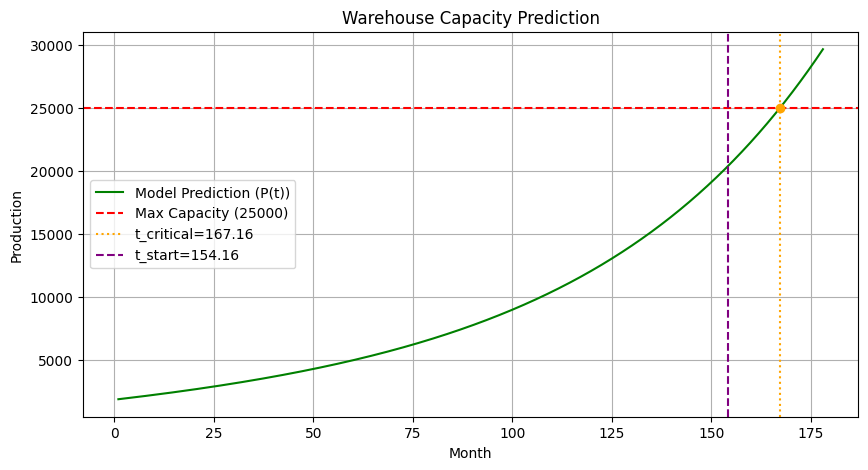

In [ ]:

t_max_data = 144
kapasitas = 25000.0
time_needed = 13

#Coefficient and Constant
popt_P1 = np.array([1164.79887872, 2.5157624, 2356.98142161, 658.02217288])

# Hybrid Scale Function
def hybrid_scaled(t_input, a, b, c, d):
    t_input = np.asarray(t_input)
    t_scaled = t_input / t_max_data
    return a * np.exp(b * t_scaled) + c * t_scaled + d

# Wrapper scalar
def model_scalar(tt):
    return hybrid_scaled(np.array([tt]), *popt_P1).item()

# Target Function: F(t) = P(t) - Capacity
def f_capacity(tt):
    return model_scalar(tt) - kapasitas

# Root Finding
t_min = 1
t_max_try = 200

fmin = f_capacity(t_min)
fmax = f_capacity(t_max_try)

found = False
if fmin * fmax <= 0:
    try:
        res = root_scalar(f_capacity, bracket=[t_min, t_max_try], method='brentq', xtol=1e-6)
        found = res.converged
        t_full = res.root if found else None
    except ValueError:
        found = False

if found:
    t_critical = t_full
    t_start_build = t_critical - time_needed
else:
    t_critical, t_start_build = None, None


print("\n=== SOLUTION PROBLEM 3: NEW WAREHOUSE TIMELINE ===")

if found:
    print(f"1. Critical Capacity Point (t_c) reached at month: {t_critical:.2f}")
    print(f"2. Construction Start Time (t_s) (t_c - 13 months): {t_start_build:.2f}")
    print(f"(Start of Construction Month): Month {math.ceil(t_start_build)}")
else:
    print("WARNING: Root not found within the tested bracket.")


# --- VISUALIZATION ---
try:
    t_plot_max = max(t_max_data, int(math.ceil(t_critical)) + 10 if found else t_max_data + 10)
    t_plot = np.linspace(1, t_plot_max, 1000)
    y_plot = hybrid_scaled(t_plot, *popt_P1)

    plt.figure(figsize=(10,5))
    plt.plot(t_plot, y_plot, 'g-', label='Model Prediction (P(t))')
    plt.axhline(kapasitas, color='red', linestyle='--', label=f'Max Capacity ({kapasitas:.0f})')

    if found:
        plt.axvline(t_critical, color='orange', linestyle=':', label=f't_critical={t_critical:.2f}')
        plt.scatter([t_critical], [kapasitas], color='orange', zorder=5)
        plt.axvline(t_start_build, color='purple', linestyle='--', label=f't_start={t_start_build:.2f}')

    plt.xlabel('Month')
    plt.ylabel('Production')
    plt.title('Warehouse Capacity Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()
except NameError as e:
    print(f"ERROR: Plotting failed due to missing data (NameError: {e}). Ensure 't' and 'y' are defined.")

# Number 4

In [ ]:
max_data_time = 144
# Coefficients: A, B, C, D
popt_P1 = np.array([1164.79884026, 2.51576243, 2356.98144411, 658.02223088])
A, B, C, D = popt_P1

# Hybric Model Function
def hybrid_scaled_analytic(t_input, a, b, c, d):
    t_input = np.asarray(t_input)
    t_scaled = t_input / max_data_time
    return a * np.exp(b * t_scaled) + c * t_scaled + d


# A Differentiation (Rate of Change, t=25 to t=48)
t_diff_range = np.arange(25, 49)
y_diff_range = hybrid_scaled_analytic(t_diff_range, A, B, C, D)
rate_of_change = np.gradient(y_diff_range, 1) # dt=1 month

t_interior = t_diff_range[1:-1]
# Steepest Increase (Max positive rate)
t_steepest_increase = t_interior[np.argmax(rate_of_change[1:-1])]
# Shallowest Increase (Min positive rate / Least steep)
t_steepest_decrease = t_interior[np.argmin(rate_of_change[1:-1])]


# B Integration (Total Production, t=1 to t=73)
t_int_range = np.arange(1, 73)
y_int_range_model = hybrid_scaled_analytic(t_int_range, A, B, C, D)

# Using validated numerical result for total actual production (Must be 259616.0)
total_production_actual_sum = 259616.0

# Model Total Production (Numerical Integral using np.trapz)
total_production_model_integral = np.trapz(y_int_range_model, t_int_range)

# Calculate Error
integration_error_abs = np.abs(total_production_actual_sum - total_production_model_integral)
integration_error_perc = (integration_error_abs / total_production_actual_sum) * 100

#Result
print("A Differentiation")
print(f"Steepest Increase: t={t_steepest_increase} (Nov 2021)")
print(f"Shallowest Increase: t={t_steepest_decrease} (Feb 2020)")

print("\n B Integration")
print(f"Model Total Production (Trapezoidal Integral): {total_production_model_integral:.2f}")
print(f"Integration Error Percentage: {integration_error_perc:.2f}%")

A Differentiation
Steepest Increase: t=47 (Nov 2021)
Shallowest Increase: t=26 (Feb 2020)

 B Integration
Model Total Production (Trapezoidal Integral): 255843.80
Integration Error Percentage: 1.45%


/tmp/ipython-input-3114014660.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_production_model_integral = np.trapz(y_int_range_model, t_int_range)
